# Kaggle Study 10일차(home_credit)

코드출처 : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

## Introduction: Home Credit Default Risk Competition

이 노트북은 기계 학습 대회를 처음 접하거나 문제를 부드럽게 소개하고자 하는 사람들을 위한 것입니다. 저는 기계 학습을 시작하는 방법의 기초를 보여주기 위해 일부러 복잡한 모델에 뛰어들거나 많은 데이터를 결합하는 것을 피합니다! 어떠한 의견이나 제안도 매우 감사합니다.

이 노트북에서 우리는 현재 Kaggle에서 열리고 있는 Home Credit 기본 위험 기계 학습 대회에 대해 처음 살펴볼 것이다. 이 대회의 목적은 과거 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 것이다. 다음은 표준 감독 분류 작업입니다.

supervised : 레이블은 교육 데이터에 포함되며 목표는 형상을 통해 레이블을 예측하는 방법을 학습하는 모델을 교육하는 것이다.
classification : 라벨은 이항 변수 0(대출금을 제때 상환할 예정), 1(대출금 상환에 어려움이 있음)입니다.

## Data

이 데이터는 무은행 모집단에 제공되는 신용(대출) 전용 서비스인 홈 크레딧에서 제공합니다. 고객이 대출금을 상환할 것인지 어려움을 겪을 것인지를 예측하는 것은 매우 중요한 비즈니스 요구 사항이며, 홈 크레딧은 Kaggle에서 머신 러닝 커뮤니티가 어떤 모델을 개발하여 이 과제에 도움을 줄 수 있는지 보기 위해 이 대회를 주최하고 있다.

데이터 소스는 7가지입니다.

- Application_train/application_test: 홈 크레딧의 각 대출 애플리케이션에 대한 정보가 포함된 기본 교육 및 테스트 데이터입니다. 모든 대출에는 자체 행이 있으며 기능 SK_로 식별됩니다.ID_CURR입니다. 교육 신청 데이터는 대출금이 상환되었거나 1: 대출금이 상환되지 않았음을 나타내는 목표값과 함께 제공됩니다.
- bureau: 고객의 이전 신용도에 대한 다른 금융 기관의 데이터. 각 이전 크레딧에는 자체 행이 있지만, 애플리케이션 데이터의 한 대출에는 여러 개의 이전 크레딧이 있을 수 있습니다.
- bure_balance: bureau의 이전 크레딧에 대한 월별 데이터입니다. 각 행은 이전 크레딧의 한 달이며, 하나의 이전 크레딧은 크레딧 길이의 각 월에 하나씩 여러 행을 가질 수 있습니다.
- previous_application: 신청 데이터에 대출이 있는 고객의 홈크레딧에서 대출에 대한 이전 신청. 응용 프로그램 데이터의 각 현재 대출에는 여러 개의 이전 대출이 있을 수 있습니다. 각 이전 애플리케이션은 하나의 행을 가지며 SK_ 기능으로 식별됩니다.ID_PREV입니다.
- POS_CASH_BALANCE: 이전 판매 시점 또는 고객이 홈 크레딧에 보유한 현금 대출에 대한 월별 데이터입니다. 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며, 한 번의 이전 대출은 여러 행을 가질 수 있습니다.
- credit_card_balance: 고객이 홈 크레딧에 가지고 있던 이전 신용 카드에 대한 월별 데이터입니다. 각 행은 신용카드 잔액의 한 달이며, 하나의 신용카드는 여러 행을 가질 수 있습니다.
- installments_payment : 홈 크레딧의 이전 대출에 대한 결제 내역입니다. 결제 시마다 한 행씩, 결제 누락 시 한 행씩 있습니다.

또한 모든 열의 정의(HomeCredit_columns_description.csv)와 예상 제출 파일의 예가 제공됩니다.

이 노트북에서는 주요 애플리케이션 교육 및 테스트 데이터만 계속 사용할 것입니다. 비록 우리가 진지하게 경쟁할 수 있는 어떤 희망을 가지려면 모든 데이터를 사용해야 하지만, 지금은 좀 더 관리하기 쉬운 파일 하나를 고수할 것입니다. 이것은 우리가 개선시킬 수 있는 기준을 세울 수 있게 해줄 것이다. 이러한 프로젝트들로, 완전히 길을 잃기 보다는 한 번에 조금씩 문제에 대한 이해를 쌓는 것이 가장 좋습니다!

## Metric: ROC AUC

일단 데이터를 파악하면(칼럼 설명을 읽는 것이 매우 도움이 된다) 우리의 제출이 판단되는 메트릭을 이해할 필요가 있다. 이 경우, 커브 아래의 수신기 작동 특성 영역(ROC AUC, AUROC라고도 함)으로 알려진 공통 분류 메트릭이다.

ROC AUC는 위협적으로 들릴 수 있지만, 두 가지 개별 개념을 이해할 수 있다면 비교적 간단하다. 수신기 작동 특성(ROC) 곡선은 실제 양수 대 거짓 양수 비율을 그래프로 표시합니다.


그래프의 한 선은 단일 모형의 곡선을 나타내고, 선을 따라 이동하면 양의 인스턴스를 분류하는 데 사용되는 임계값이 변경되었음을 나타냅니다. 임계값은 오른쪽 상단의 0에서 시작하여 왼쪽 하단의 1로 이동합니다. 왼쪽과 다른 곡선 위에 있는 곡선은 더 나은 모형을 나타냅니다. 예를 들어, 파란색 모델이 빨간색 모델보다 낫습니다. 이 모델은 순진한 무작위 추측 모델을 나타내는 검은색 대각선보다 좋습니다.

곡선 아래의 영역(AUC)은 그 이름을 스스로 설명합니다! 단순히 ROC 곡선 아래의 영역입니다. (곡선의 적분입니다.) 이 메트릭은 0과 1 사이이며 모델 점수가 더 높습니다. 랜덤하게 추측하는 모형은 ROC AUC가 0.5입니다.

ROC AUC에 따라 분류기를 측정할 때, 우리는 0 또는 1 예측을 생성하는 것이 아니라 0과 1 사이의 확률을 생성한다. 이것은 우리가 보통 정확성 측면에서 생각하는 것을 좋아하기 때문에 혼란스러울 수 있지만, 불균형 클래스와 관련된 문제에 직면했을 때(우리는 이것이 사실임을 알게 될 것이다) 정확도는 최상의 메트릭이 아니다. 예를 들어, 99.9999%의 정확도로 테러리스트를 탐지할 수 있는 모델을 만들고 싶다면, 모든 사람이 테러리스트가 아니라고 예측한 모델을 만들겠다. 분명히 이것은 효과적이지 않을 것이며(리콜이 0이 될 것이다) 분류기의 성능을 보다 정확하게 반영하기 위해 ROC AUC 또는 F1 점수와 같은 더 고급 메트릭을 사용한다. ROC AUC가 높은 모델도 정확도가 높겠지만 ROC AUC는 모델 성능을 더 잘 표현한다.

우리가 사용하고 있는 데이터의 배경과 최대화를 위한 메트릭을 알고 있다면, 이제 데이터 탐색에 들어가 보겠습니다. 앞서 언급한 바와 같이 이 노트북에서는 향후 작업에서 구축할 수 있는 주요 데이터 소스와 간단한 모델을 고수할 것입니다.

ROC 설명 : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
AUC 설명 : http://gim.unmc.edu/dxtests/roc3.htm

### Follow-up Notebooks

문제가 생길시 아래 노트북 참고
- Manual Feature Engineering Part One : https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- Manual Feature Engineering Part Two : https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2
- Introduction to Automated Feature Engineering : https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics
- Advanced Automated Feature Engineering : https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory
- Feature Selection : https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection
- Intro to Model Tuning: Grid and Random Search : https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- Automated Model Tuning : https://www.kaggle.com/willkoehrsen/automated-model-tuning
- Model Tuning Results : https://www.kaggle.com/willkoehrsen/model-tuning-results-random-vs-bayesian-opt/notebook

## 1회차

## Imports

In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data

먼저 사용 가능한 데이터 파일을 모두 나열할 수 있습니다. 교육용(대상 포함) 기본 파일 1개 테스트용(대상 제외) 기본 파일 1개, 예제 제출 파일 1개, 각 대여에 대한 추가 정보가 포함된 기타 파일 6개 등 총 9개의 파일이 있습니다.

In [2]:
print(os.listdir("C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/home_credit/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
app_train = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/home_credit/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Train 데이터에는 307511개의 관측치(각각 개별 대여)와 TARGET(예측하려는 레이블)을 포함한 122개의 형상(변수)이 있다.

In [4]:
app_test = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/home_credit/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


검정 집합이 상당히 작고 Target 열이 없습니다.

## Exploratory Data Analysis
탐색적 데이터 분석(EDA)은 통계량을 계산하고 수치를 만들어 데이터 내의 추세, 이상 징후, 패턴 또는 관계를 찾는 개방형 프로세스이다. EDA의 목표는 데이터가 우리에게 무엇을 알려줄 수 있는지 배우는 것입니다. 일반적으로 높은 수준의 개요로 시작한 다음 흥미로운 데이터 영역을 찾을 때 특정 영역으로 좁혀집니다. 연구 결과는 그 자체로 흥미로울 수도 있고, 어떤 기능을 사용할지 결정하는 데 도움을 줌으로써 우리의 모델 선택에 정보를 제공하는 데 사용될 수도 있습니다.

### Examine the Distribution of the Target Column
대출에 대한 0이 제때 상환되었거나 고객이 지불에 어려움을 겪었다는 것을 나타내는 1이 있습니다. 우리는 우선 각 범주에 속하는 대출 건수를 조사할 수 있다.

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

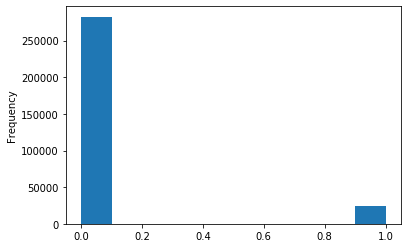

In [6]:
app_train['TARGET'].astype(int).plot.hist()

이 정보를 통해 우리는 이것이 불균형적인 클래스 문제임을 알 수 있습니다. 제때 갚지 못한 대출보다 제때 갚은 대출이 훨씬 많다. 일단 우리가 더 정교한 기계 학습 모델에 들어가면, 우리는 이러한 불균형을 반영하기 위해 데이터의 표현에 따라 클래스의 가중치를 부여할 수 있다.

### Examine Missing Values
다음에는 각 열에 있는 결측값의 수와 백분율을 확인할 수 있습니다.

In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum()/len(df)
    
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    print("Your selected dataframe has "+str(df.shape[1]) + ' columns.\n There are '+ str(mis_val_table_ren_columns.shape[0])+' columns that have missing values.')
    
    return mis_val_table_ren_columns        

In [8]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
 There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신 러닝 모델을 구축할 때가 되면 이러한 결측값을 채워야 할 것이다. 이후 작업에서는 귀책 없이 결측값을 처리할 수 있는 XGBoost 등의 모델을 사용할 예정이다. 결측값의 비율이 높은 열을 삭제하는 방법도 있지만 이러한 열이 모형에 도움이 되는지 여부를 미리 알 수는 없습니다. 따라서, 우리는 일단 모든 칼럼을 보관할 것입니다.

### Column Types

각 데이터 유형의 열 수를 살펴보겠습니다. int64 및 float64는 숫자 변수입니다(별개 변수이거나 연속 변수일 수 있음). 객체 열은 문자열을 포함하며 범주형 기능입니다.

In [9]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 각 개체(범주형) 열의 고유한 항목 수를 살펴보겠습니다.

In [10]:
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수는 고유한 항목 수가 상대적으로 적습니다. 우리는 이러한 범주형 변수를 다룰 방법을 찾아야 할 것이다!

### Encoding Categorical Variables
더 나아가기 전에, 우리는 성가신 범주형 변수를 다룰 필요가 있다. 기계 학습 모델은 안타깝게도 범주형 변수를 처리할 수 없습니다(LightGBM과 같은 일부 모델은 제외). 따라서, 우리는 이러한 변수를 모형에 넘기기 전에 숫자로 인코딩(표현)하는 방법을 찾아야 한다. 이 프로세스를 수행하는 두 가지 주요 방법은 다음과 같습니다.

- Label encoding: 범주형 변수의 각 고유 범주를 정수로 할당합니다. 새 열이 생성되지 않습니다.

- One-Hot encoding: 범주형 변수의 각 고유 범주에 대한 새 열을 만듭니다. 각 관측치는 해당 범주에 대한 열의 1과 다른 모든 새 열의 0을 수신합니다.

레이블 인코딩의 문제는 카테고리에 임의 순서를 부여한다는 것입니다. 각 범주에 할당된 값은 랜덤이며 범주의 고유한 측면을 반영하지 않습니다. 위의 예에서 프로그래머는 4를 받고 데이터 과학자는 1을 받지만, 만약 우리가 같은 과정을 다시 한다면, 라벨은 뒤바뀌거나 완전히 다를 수 있다. 정수의 실제 할당은 임의적입니다. 따라서 레이블 인코딩을 수행할 때 모델은 기능의 상대적 값(예: 프로그래머 = 4 및 데이터 과학자 = 1)을 사용하여 우리가 원하는 가중치를 할당할 수 있다. 범주형 변수(예: 남성/여성)에 대해 고유한 값이 두 개만 있으면 레이블 인코딩은 괜찮지만, 고유한 범주가 두 개 이상인 경우 단일 핫 인코딩이 안전 옵션이다.

이러한 접근 방식의 상대적 장점에 대한 일부 논쟁이 있으며, 일부 모델은 레이블로 인코딩된 범주형 변수를 문제 없이 처리할 수 있다. 이에 해당하는 스택 오버플로에 대한 좋은 토론입니다. 
토론 링크 : https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

클래스가 많은 범주형 변수에 대해 개인적으로 단일 핫 인코딩은 범주에 임의 값을 부과하지 않기 때문에 가장 안전한 접근법이라고 생각한다. 단일 핫 인코딩의 유일한 단점은 특징 수(데이터의 치수)가 많은 범주의 범주형 변수로 폭발할 수 있다는 것이다. 이를 처리하기 위해 PCA 또는 기타 차원 축소 방법에 이어 원핫 인코딩을 수행하여 차원 수를 줄일 수 있다(정보 보존을 계속 시도함).

이 노트북에서는 범주가 2개만 있는 모든 범주형 변수에 대해 레이블 인코딩을 사용하고 범주가 2개 이상인 모든 범주형 변수에 대해 One-Hot 인코딩을 사용합니다. 이 프로세스는 프로젝트에 더 깊이 들어가면서 변화해야 할 수도 있지만, 현재로서는 이것이 우리를 어디로 이끌지 알 수 있을 것입니다. (또한 이 노트북에서는 치수 축소를 사용하지 않고 향후에도 탐색할 것입니다.)


#### Label Encoding and One-Hot Encoding
위에서 설명한 정책을 구현해 봅시다. 고유 범주가 2개인 모든 범주형 변수(dtype == object)에 대해 레이블 인코딩을 사용하고 고유 범주가 2개 이상인 모든 범주형 변수에 대해 단일 핫 인코딩을 사용합니다.

레이블 인코딩의 경우 Scikit-Learn Label Encoder를 사용하고 원핫 인코딩의 경우 판다 get_dummies(df) 함수를 사용한다.

In [11]:
#label encoding 방식
#label encoder ojbect 생성
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique()))<=2:
            le.fit(app_train[col])
            
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count +=1
            
print('%d columns were label encoded.'%le_count)

3 columns were label encoded.


In [12]:
#one-hot encoding 방식
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ',app_train.shape)
print('Testing Features shape: ',app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


#### Aligning Training and Testing Data

교육 데이터와 테스트 데이터 모두에 동일한 특성(열)이 있어야 합니다. One-Hot 인코딩은 테스트 데이터에 범주를 표시하지 않는 일부 범주형 변수가 있기 때문에 교육 데이터에 더 많은 열을 생성했습니다. 테스트 데이터에 없는 교육 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다.  
  
먼저 교육 데이터에서 목표 열을 추출합니다(이 열은 테스트 데이터에 없지만 이 정보는 보관해야 하기 때문입니다. 정렬을 할 때는 행이 아닌 열을 기준으로 데이터 프레임을 정렬하도록 축 = 1을 설정해야 합니다!

In [13]:
train_labels= app_train['TARGET']

app_train,app_test = app_train.align(app_test,join='inner',axis=1)

app_train['TARGET'] = train_labels

print('Training Features shape: ',app_train.shape)
print('Testing Features shape: ',app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


이제 교육 및 테스트 데이터 세트는 기계 학습에 필요한 동일한 기능을 제공합니다. One-Hot 인코딩으로 인해 기능 수가 크게 증가했습니다. 어느 시점에서는 데이터셋 크기를 줄이기 위해 차원 축소(관련되지 않은 기능 제거)를 시도할 수 있습니다.

### Back to Exploratory Data Analysis
#### Anomalies

EDA를 수행할 때 항상 주의해야 하는 한 가지 문제는 데이터 내의 이상 현상입니다. 이는 잘못 입력한 숫자, 측정 장비의 오류 또는 유효하지만 극단적인 측정 때문일 수 있습니다. 이상 징후를 정량적으로 지원하는 한 가지 방법은 설명 방법을 사용하여 열의 통계를 보는 것입니다. DAYS_BIRTH 열의 숫자는 현재 대출 신청서에 상대적으로 기록되므로 음수입니다. 연도별 통계를 보려면 -1을 곱하고 일 수로 나누면 됩니다.

In [14]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

최대 값(긍정적인 것 외에)이 약 1000년으로 나온 걸 보면 정상적인 값이 들어가 있지 않은걸 알 수 있다.

Text(0.5, 0, 'Days Employment')

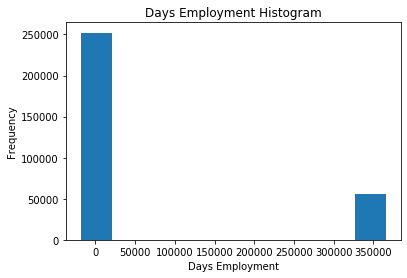

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

그냥 궁금해서, 변칙적인 고객들을 선별해서 다른 고객들보다 채무불이행 비율이 더 높은지 낮은지 알아보도록 해요.

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!=365243]
print('The non-anomalies default on %0.2f%% of loans'%(100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans'%(100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment'%len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


음, 그것은 매우 흥미롭군요! 이상 징후는 기본 설정 비율이 더 낮은 것으로 나타났습니다.

이상 징후를 처리하는 것은 규칙이 설정되지 않은 정확한 상황에 따라 달라집니다. 가장 안전한 방법 중 하나는 기계 학습 전에 이상 징후를 결측값으로 설정한 다음 (Imputation 사용) 기입하는 것입니다. 이 경우 모든 이상 징후는 동일한 값을 가지기 때문에 이러한 모든 대출이 공통점을 공유하는 경우에 대비하여 동일한 값으로 채우려고 합니다. 변칙적인 값들은 어느 정도 중요한 것 같기 때문에, 우리가 실제로 이 값들을 채웠는지 기계 학습 모델을 알려주고 싶습니다. 해결책으로 숫자가 아닌 변칙값(np.nan)을 채운 다음 값이 변칙적이었는지 여부를 나타내는 부울 열을 새로 만들 것입니다.

Text(0.5, 0, 'Days Employment')

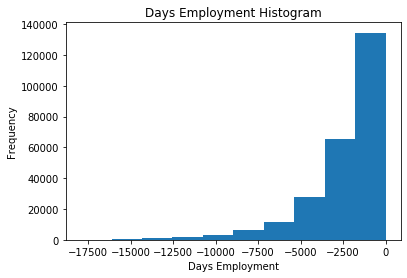

In [18]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED']==365243

app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

분포는 우리가 예상하는 것과 훨씬 더 일치하는 것으로 보이며, 또한 이 값들이 원래 비정상적인 것이라는 것을 모형에 알리기 위해 새로운 열을 만들었습니다(왜냐하면 우리는 일부 값, 아마도 열의 중위수) 데이터 프레임에 DAYS가 있는 다른 열은 명확한 특이치 없이 예상되는 열에 대한 것으로 보입니다.

매우 중요한 참고 사항으로서, 교육 데이터에 대해 우리가 해야 하는 모든 작업은 테스트 데이터에도 적용됩니다. 새 열을 만들고 검정 데이터에서 기존 열을 np.nan으로 채우도록 하겠습니다.

In [19]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED']==365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

print('There are %d anomalies in the test data out of %d entries'
     % (app_test['DAYS_EMPLOYED_ANOM'].sum(),len(app_test)))


There are 9274 anomalies in the test data out of 48744 entries


#### Correlations
이제 범주형 변수와 특이치를 다루었으므로 EDA를 계속 살펴보겠습니다. 데이터를 이해하려는 한 가지 방법은 기능과 대상 간의 상관 관계를 찾는 것입니다. .corr 데이터 프레임 방법을 사용하여 모든 변수와 대상 간의 Pearson 상관 계수를 계산할 수 있습니다.

상관 계수는 형상의 "관련성"을 나타내는 가장 좋은 방법은 아니지만 데이터 내에서 가능한 관계에 대한 아이디어를 제공합니다. 상관 계수의 절대값에 대한 일반적인 해석은 다음과 같습니다.

- .00-.19 :매우 약함
- .20-.39 :약함
- .40-.59 :보통
- .60-.79 :강함
- .80-1.0 :매우 강함

In [20]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n',correlations.tail(15))
print('Most Negative Correlations:\n',correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most Negativ

이제 DAYS_BIRTH가 가장 긍정적인 상관 관계라는 더 중요한 상관 관계를 살펴보겠습니다. (변수 자체와의 상관 관계가 항상 1이므로 Target은 제외됩니다!) 문서를 살펴보면, DAYS_BILITE는 대출 시점(어떤 이유로든!)의 고객 연령(일)입니다. 상관 관계는 양수이지만 이 기능의 값은 실제로 음수이므로, 클라이언트가 나이가 들수록 대출에 대한 채무불이행(즉, 목표 == 0)이 발생할 가능성이 적습니다. 그건 좀 헷갈리니까, 기능의 절대값을 취하면 상관관계가 음수가 됩니다.

#### Effect of Age on Repayment

In [21]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

고객이 나이가 들수록 목표액과 부정적인 선형 관계가 형성되는데, 이는 고객이 나이가 들수록 대출금을 제때 상환하는 경우가 더 많다는 것을 의미합니다.

이제 이 변수를 살펴보겠습니다. 먼저, 우리는 그 시대의 히스토그램을 만들 수 있습니다. 우리는 몇 년 안에 X축을 배치하여 줄거리를 좀 더 이해할 수 있도록 할 것입니다.

Text(0, 0.5, 'Count')

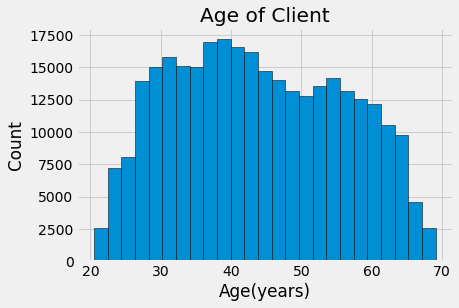

In [22]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_BIRTH']/365,edgecolor='k',bins=25)
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Count')

그 자체로, 연령의 분포는 모든 연령이 합리적이기 때문에 특이치가 없다는 것 말고는 우리에게 많은 것을 말해주지 않습니다. 연령이 대상에 미치는 영향을 시각화하기 위해 다음으로 목표값으로 색칠된 커널 밀도 추정 그림(KDE)을 만들 것입니다. 
  
커널 밀도 추정 그림은 단일 변수의 분포를 나타내며 평활 히스토그램으로 생각할 수 있습니다(각 데이터 지점에서 커널(일반적으로 가우스)을 계산한 다음 모든 개별 커널을 평균하여 단일 평활 곡선을 개발합니다). 이 그래프에는 seaborn kdeplot를 사용합니다.

Text(0, 0.5, 'Density')

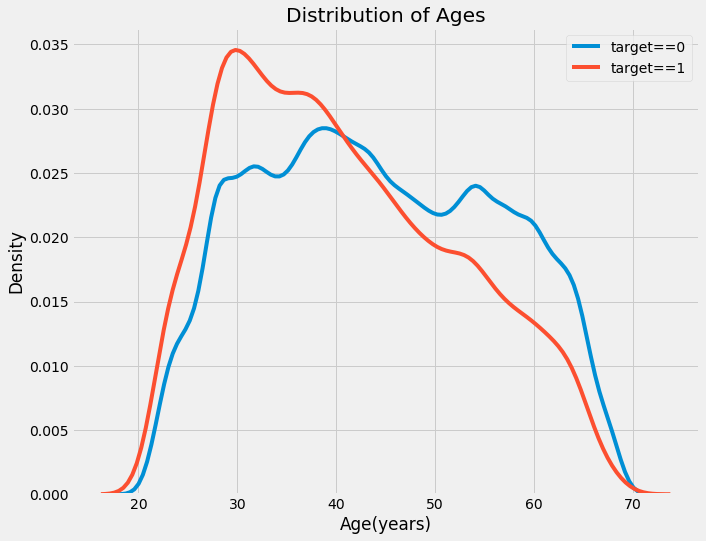

In [23]:
plt.figure(figsize=(10,8))

sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')
plt.title('Distribution of Ages')
plt.xlabel('Age(years)')
plt.ylabel('Density')

목표 == 1 곡선은 젊은 쪽으로 치우쳐 있습니다. 유의한 상관 계수(-0.07 상관 계수)는 아니지만 이 변수는 대상에 영향을 미치기 때문에 기계 학습 모델에 유용할 수 있습니다. 다른 방법으로 이 관계를 보자면, 평균 연령대별 대출 상환에 실패한것을 볼 수 있습니다.

이 그래프를 만들기 위해, 먼저 연령 범주를 각각 5년씩의 빈으로 잘라냅니다. 그런 다음 각 빈에 대해 목표값의 평균값을 계산하여 각 연령 범주에서 상환되지 않은 대출의 비율을 알려줍니다.

In [24]:
#나이 계산
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

#해당 나이에 들어가는 범위 구하기
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0, 0.5, 'Failure to Repay (%)')

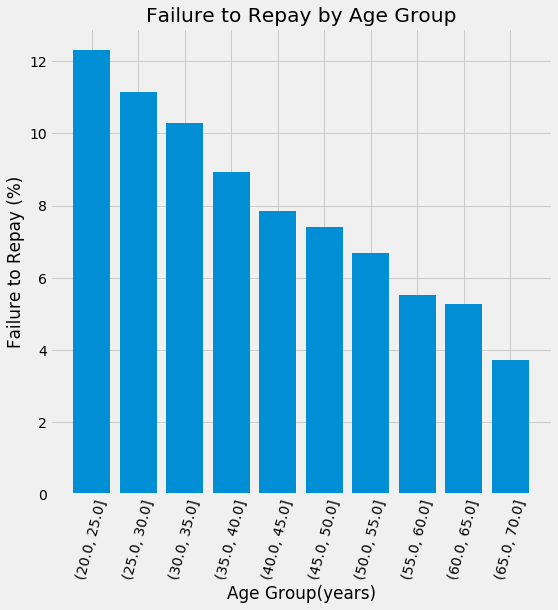

In [26]:
plt.figure(figsize=(8,8))

plt.bar(age_groups.index.astype(str),100*age_groups['TARGET'])

plt.xticks(rotation=75)
plt.title('Failure to Repay by Age Group')
plt.xlabel('Age Group(years)')
plt.ylabel('Failure to Repay (%)')

분명한 경향이 있습니다: 젊은 지원자들은 대출금을 상환하지 않을 가능성이 더 높습니다! 상환불능률은 3세 연령대가 10% 이상, 최고령 연령대가 5% 이하입니다.  
  
이것은 은행이 직접 사용할 수 있는 정보입니다. 젊은 고객들이 대출금을 상환할 가능성이 낮기 때문에, 그들에게 더 많은 안내나 재정 계획 팁을 제공해야 할 수도 있습니다. 이것은 은행이 젊은 고객들을 차별해야 한다는 것을 의미하지는 않지만, 젊은 고객들이 제때 돈을 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것입니다.  
  
#### Exterior Sources
대상과 가장 강한 음의 상관 관계를 갖는 세 변수는 EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3입니다. 설명서에 따르면 이러한 기능은 "외부 데이터 원본에서 정규화된 점수"를 나타냅니다. 정확히 무슨 뜻인지는 모르겠지만, 수많은 자료들을 이용해서 만든 누적 신용등급일 수도 있습니다.  
 
이 변수들을 살펴보죠.  
  
먼저 EXT_SOURCE 기능의 상관 관계를 대상 및 서로 보여줄 수 있습니다.

In [27]:
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation Heatmap')

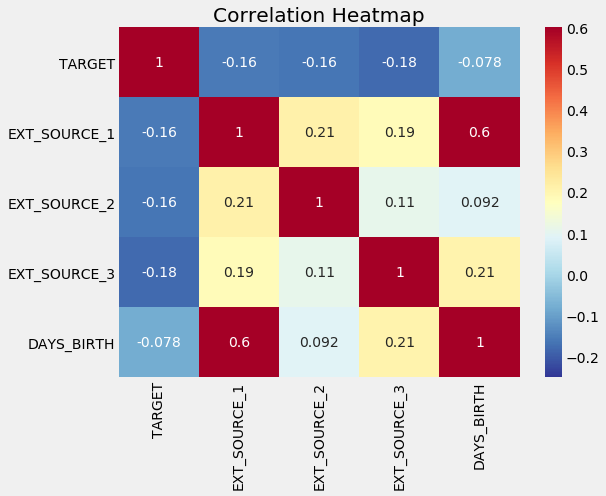

In [28]:
plt.figure(figsize=(8,6))

sns.heatmap(ext_data_corrs,cmap=plt.cm.RdYlBu_r,vmin=-0.25,annot=True,vmax=0.6)
plt.title('Correlation Heatmap')

세 가지 EXT_SOURCE 기능은 모두 목표값과 부정적인 상관관계를 가지고 있으며, EXT_SOURCE의 가치가 증가할수록 클라이언트가 대출금을 상환할 가능성이 더 높다는 것을 나타냅니다.   
  
또한 DAYS_BIRTH가 EXT_SOURCE_1과 긍정적인 상관관계를 가지고 있다는 것을 알 수 있습니다. 이 점수의 요인 중 하나가 클라이언트 연령일 수 있습니다.

다음에는 목표값에 따라 색상이 지정된 각 형상의 분포를 살펴볼 수 있습니다. 이렇게 하면 이 변수가 대상에 미치는 영향을 시각화할 수 있습니다.

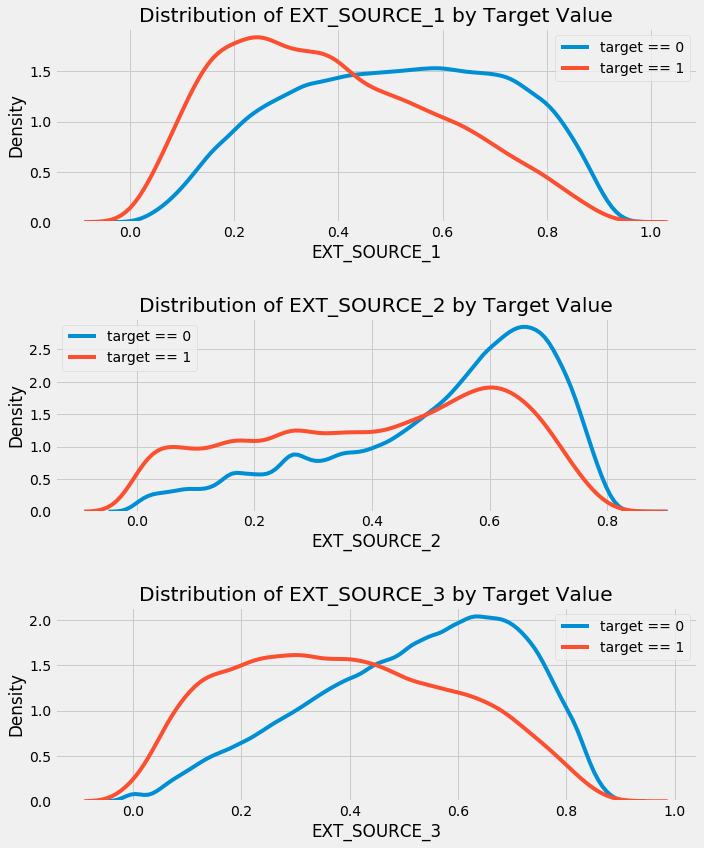

In [29]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3은 대상 값 간의 가장 큰 차이를 표시합니다. 우리는 이 기능이 신청자가 대출금을 상환할 가능성과 어느 정도 관계가 있음을 분명히 알 수 있습니다. 관계는 그리 강하지 않습니다(사실 모두 매우 약하다고 여겨지지만, 이러한 변수는 여전히 기계 학습 모델이 신청자가 대출금을 제때 상환할지 여부를 예측하는 데 유용합니다.

### Pair plot
최종 탐색 그림으로 EXT_SOURCE 변수와 DAYS_BIRTH 변수의 Pairplot을 만들 수 있습니다. Pairplot은 단일 변수의 분포뿐만 아니라 여러 변수 쌍 간의 관계를 확인할 수 있기 때문에 훌륭한 탐색 도구입니다. 여기서는 seaborn 시각화 라이브러리와 PairGrid함수를 사용하여 위쪽 삼각형의 산점도, 대각선의 히스토그램, 아래쪽 삼각형의 2D 커널 밀도 그림 및 상관 계수를 사용하여 Pairplot을 만듭니다.

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

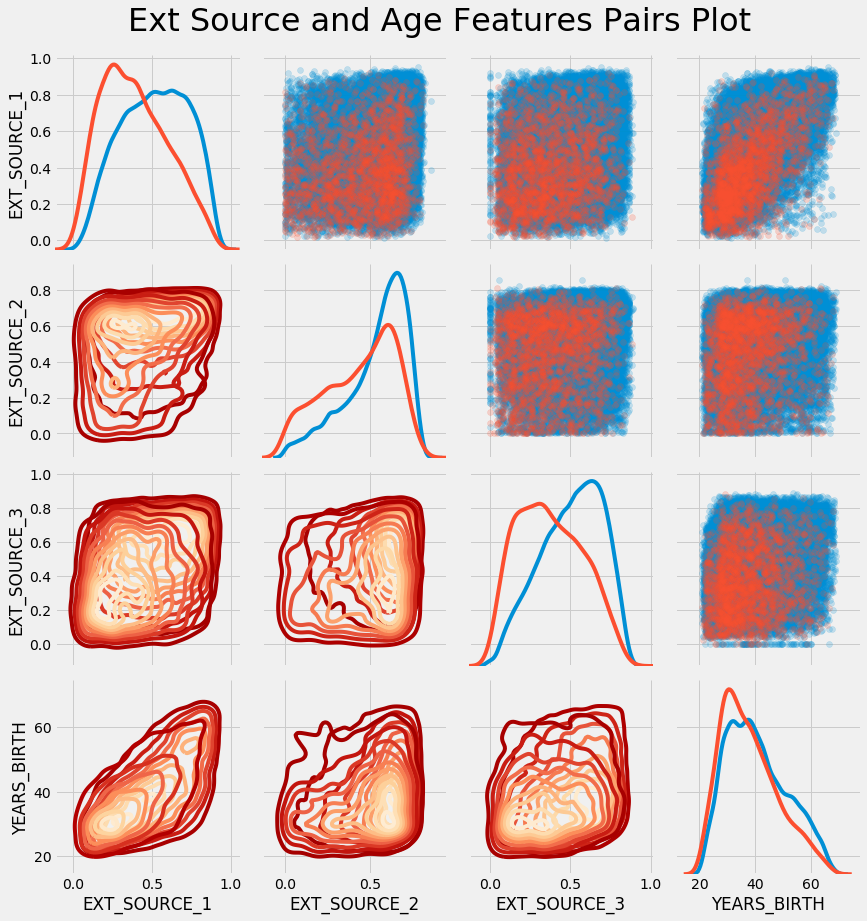

In [30]:
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000,:]

def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate('r={:.2f}'.format(r), xy=(.2,.8),xycoords=ax.tranxAxes,size=20)

grid = sns.PairGrid(data=plot_data,size=3,diag_sharey=False,hue="TARGET",
                   vars=[x for x in list(plot_data.columns)if x !='TARGET'])
grid.map_upper(plt.scatter,alpha=0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot,cmap=plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot',size=32,y=1.05)

이 그림에서 빨간색은 상환되지 않은 대출을 나타내고 파란색은 지급된 대출입니다. 우리는 데이터 내에서 서로 다른 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BIRTH(또는 이와 동등한 YEARS_BIRTH) 사이에 중간 양의 선형 관계가 있는 것으로 나타나 이 기능이 클라이언트의 나이를 고려할 수 있음을 나타냅니다.

## Feature Engineering
카글 경쟁은 피처 엔지니어링에 의해 승리됩니다. 이러한 경쟁은 데이터에서 가장 유용한 기능을 만들 수 있는 업체입니다. (이것은 적어도 구조화된 데이터의 경우 모두 그레이디언트 부스팅의 변형인 경우가 대부분입니다.) 이는 기계 학습의 패턴 중 하나를 나타냅니다. 기능 엔지니어링은 모델 구축 및 하이퍼 파라미터 튜닝보다 투자 수익률이 더 높습니다. 이것은 그 주제에 관한 훌륭한 기사입니다.  
  
기사링크 : https://community.alteryx.com/t5/Data-Science/Feature-Engineering-Secret-to-Data-Science-Success/ba-p/545041
  
Andrew Ng는 다음과 같이 말하기를 좋아합니다: "응용 기계 학습은 기본적으로 기능 공학입니다."  
  
올바른 모형과 최적의 설정을 선택하는 것은 중요하지만, 모형은 주어진 데이터에서만 배울 수 있습니다. 이 데이터가 작업에 최대한 관련되도록 하는 것은 데이터 과학자의 일입니다(그리고 우리를 돕기 위한 자동화된 도구일 수도 있습니다).  
  
피처 엔지니어링은 일반적인 프로세스를 의미하며 기존 데이터에서 새로운 기능을 추가하고 피처 선택: 가장 중요한 기능만 선택하거나 치수 축소를 위한 다른 방법을 선택하는 두 가지 기능 구성을 모두 포함할 수 있습니다. 기능을 만들고 기능을 선택하는 데 사용할 수 있는 여러 가지 기술이 있습니다.  
  
다른 데이터 소스를 사용하기 시작할 때는 많은 기능 엔지니어링을 수행하겠지만, 이 노트북에서는 두 가지 간단한 기능 구성 방법만 시도해 보겠습니다.  

- Polynomial features(다항식 피쳐)
- Domain knowledge features(도메인 지식 기능)
  

### Polynomial features
한 가지 간단한 형상 생성 방법을 polynomial features라고 합니다. 이 방법에서는 기존 기능 간의 상호 작용 용어뿐만 아니라 기존 기능의 힘인 기능을 만듭니다. 예를 들어 EXT_SOURce_1^2 변수와 EXT_SOURce_1 x EXT_SOURce_2^2 변수, EXT_SOURce_1 x EXT_SOURce_2^2 변수 등을 생성할 수 있습니다. 
  
  여러 개별 변수의 조합인 이러한 특성은 변수 간의 상호작용을 캡처하기 때문에 상호작용 항이라고 합니다. 즉, 두 변수 자체는 대상에 큰 영향을 미치지 않지만 두 변수를 하나의 상호작용 변수로 결합하면 대상과의 관계가 나타날 수 있습니다. 상호작용 항은 통계 모델에서 여러 변수의 효과를 포착하기 위해 일반적으로 사용되지만 기계 학습에서 자주 사용되는 것으로 보이지는 않습니다. 그럼에도 불구하고, 고객이 대출금을 상환할지 여부를 예측하는 데 도움이 될 수 있는지 몇 가지를 시험해 볼 수 있습니다.

Jake VanderPlas는 더 많은 정보를 원하는 사람들을 위해 그의 훌륭한 저서 Python for Data Science에서 다항식 기능에 대해 쓰고 있습니다.  
  
설명 링크 : https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html

다음 코드에서는 EXT_SOURce 변수와 DAYS_BIRT 변수를 사용하여 다항식 형상을 만듭니다. Scikit-Learn에는 다항식 및 교호작용 항을 지정된 정도까지 생성하는 다항식 기능이라는 유용한 클래스가 있습니다. 정도를 3으로 사용하여 결과를 볼 수 있습니다(다항식 형상을 만들 때 형상 수가 정도에 따라 기하급수적으로 확장되고 과적합 문제가 발생할 수 있기 때문에 너무 높은 수준의 사용을 피하고 싶습니다).

In [31]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
poly_transformer = PolynomialFeatures(degree = 3)

In [32]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ',poly_features.shape)

Polynomial Features shape:  (307511, 35)


이렇게 하면 상당한 수의 새로운 특성이 만들어집니다. 이름을 가져오려면 다항식 피쳐 get_feature_names 방법을 사용해야 합니다.

In [33]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

최대 3차항까지 상승된 개별 특징과 상호작용 항을 가진 35개의 특징이 있습니다. 이제 이러한 새로운 기능이 대상과 상관관계가 있는지 확인할 수 있습니다.

In [34]:
poly_features = pd.DataFrame(poly_features,
                             columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_corrs=poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.head(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
Name: TARGET, dtype: float64


새 변수 중 몇 개는 원래 형상보다 대상과 더 큰 (절대적인 크기 측면에서) 상관 관계를 가지고 있습니다. 머신 러닝 모델을 구축할 때 이러한 기능을 사용하거나 사용하지 않고 모델이 실제로 학습하는 데 도움이 되는지 여부를 판단할 수 있습니다.

교육 및 테스트 데이터 사본에 이러한 기능을 추가한 다음 기능이 있는 모델과 없는 모델을 평가합니다. 기계 학습에서, 접근법이 효과가 있을지를 아는 유일한 방법은 그것을 시험해 보는 것입니다!

In [35]:
poly_features_test = pd.DataFrame(poly_features_test,columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### Domain Knowledge Features

제가 신용 전문가가 아니기 때문에 이것을 "도메인 지식"이라고 부르는 것이 완전히 옳은 것은 아닐 수도 있지만, 우리는 이것을 "제한적인 금융 지식을 적용하려는 시도"라고 부를 수도 있습니다. 이러한 관점에서 고객이 대출에 대해 채무불이행 여부를 확인하는 데 중요하다고 생각하는 사항을 캡처하는 몇 가지 기능을 만들 수 있습니다. 여기서는 Aguiar의 스크립트에서 영감을 얻은 다섯 가지 기능을 사용합니다.

- CREDIT_INCOME_PERCENT: 고객의 수입에 상대적인 크레딧 금액의 백분율입니다.
- ANNUITY_INCOME_PERCENT: 고객의 소득 대비 대출 연금의 백분율입니다.
- CREDIT_TERM: 지급 기간(연금이 매월 지불해야 하는 금액이므로)입니다.
- DAYS_EMPLOYED_PERCENT: 고객의 연령에 비례하여 고용된 요일의 백분율입니다.

In [36]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED']/app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED']/app_test_domain['DAYS_BIRTH']

#### Visualize New Variables
그래프에서 이러한 도메인 지식 변수를 시각적으로 조사해야 합니다. 이 모든 것에 대해 동일한 KDE 그림을 Target 값으로 색칠합니다.

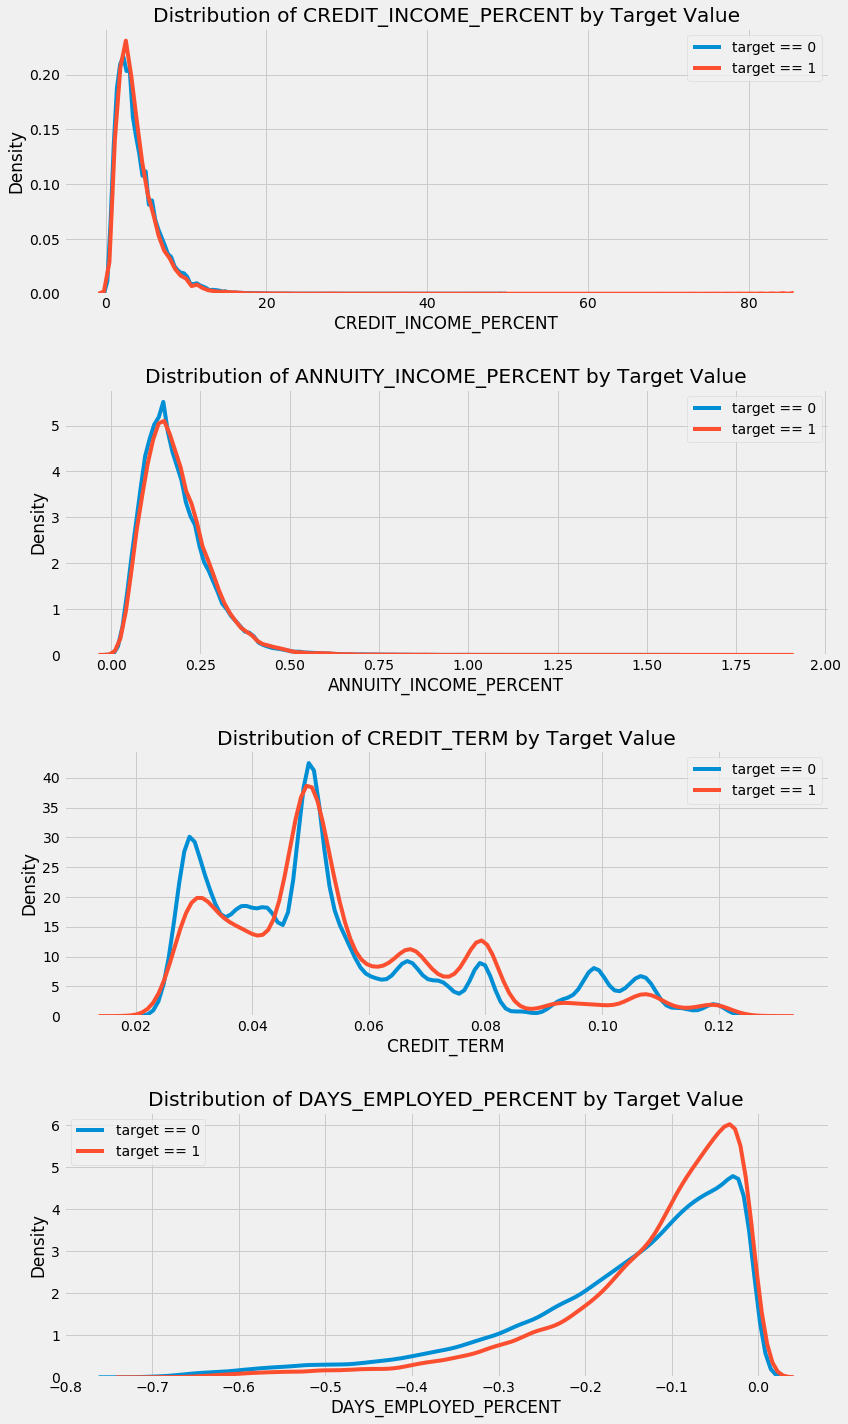

In [37]:
plt.figure(figsize = (12, 20))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(4, 1, i + 1)
    
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

이러한 새로운 기능이 유용할지 미리 말하기는 어렵습니다. 확실히 알 수 있는 유일한 방법은 그것들을 시험해 보는 거예요!

## Baseline
단순한 기준선의 경우 테스트 세트의 모든 예에 대해 동일한 값을 추측할 수 있습니다. 대출금을 상환하지 않을 확률을 예측해야 하므로, 완전히 확신이 서지 않으면 테스트 세트의 모든 관측치에 대해 0.5를 추측할 수 있습니다. 이를 통해 우리는 경기에서 0.5의 커브 아래 수신기 작동 특성 영역(AUC ROC)을 얻을 수 있습니다(분류 작업에 대한 무작위 추측은 0.5점).

우리가 어떤 점수를 받을지 이미 알고 있기 때문에, 우리는 순진한 기준의 추측을 할 필요가 없습니다. 실제 기준선에 조금 더 정교한 모델을 사용하겠습니다. 로지스틱 회귀 분석입니다.

### Logistic Regression Implementation
여기서는 자세한 설명보다는 모델 구현에 중점을 두겠지만, 기계 학습 알고리듬의 이론에 대해 더 많이 배우고 싶은 사람들을 위해 Scikit-Learn과 TensorFlow를 이용한 통계 학습 소개와 Hands-On Machine Learning을 추천합니다. 이 두 책 모두 이론과 모델을 만드는 데 필요한 코드를 제시합니다(각각 R과 Python). 그들은 둘 다 배우는 것이 가장 좋은 방법이라는 마음가짐으로 가르치고, 매우 효과적입니다!

기준선을 얻기 위해 범주형 변수를 인코딩한 후 모든 기능을 사용할 것입니다. 결측값(귀속)을 채우고 형상 범위를 정규화(피처 스케일링)하여 데이터를 사전 처리합니다. 다음 코드는 이러한 두 가지 사전 처리 단계를 모두 수행합니다.

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()
    
features = list(train.columns)

test = app_test.copy()

impter = SimpleImputer(strategy='median')
scaler = MinMaxScaler(feature_range=(0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(app_test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print("Training data shape: ",train.shape)
print("Testing data shape: ",test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


첫 번째 모형에는 Scikit-Learn의 로지스틱 회귀 분석을 사용합니다. 기본 모형 설정에서 변경되는 유일한 방법은 정규화 모수 C를 낮추는 것입니다. 이 매개 변수는 과적합의 양을 조절합니다(낮은 값은 과적합이 감소해야 함). 이렇게 하면 기본 로지스틱 회귀 분석보다 약간 더 나은 결과를 얻을 수 있지만 향후 모든 모형에 대해 낮은 막대를 설정할 수 있습니다.

여기서는 익숙한 Scikit-Learn 모델링 구문을 사용합니다. 먼저 모델을 생성한 다음 .fit을 사용하여 모델을 교육한 다음 .preset_proba를 사용하여 테스트 데이터를 예측합니다(0이나 1이 아닌 확률을 원함).

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)

log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

이제 이 모델이 교육되었으므로, 우리는 예측에 사용할 수 있습니다. 우리는 대출금을 지불하지 않을 확률을 예측하고 싶기 때문에, 우리는 predict_proba을 사용합니다. 이 함수는 m x 2 배열을 반환하는데, 여기서 m은 관측치 수입니다. 첫 번째 열은 목표값이 0일 확률이고 두 번째 열은 목표값이 1일 확률입니다(따라서 단일 행의 경우 두 열의 합계는 1이어야 함). 우리는 대출금이 상환되지 않는 확률을 원하기 때문에 두 번째 열을 선택하겠습니다.

다음 코드는 예측하고 올바른 열을 선택합니다.

In [40]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

예측은 sample_submission.csv 파일에 표시된 형식이어야 합니다. 여기서 sample_submission.csv 파일의 열은 SK_ID_CURR 및 Target입니다. 우리는 이 형식의 데이터 프레임을 테스트 세트와 submit이라는 예측에서 만들 것입니다.

In [41]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


이 예측은 대출금이 상환되지 않을 확률을 0과 1로 나타냅니다. 이러한 예측을 사용하여 지원자를 분류하는 경우 대출이 위험하다고 판단할 수 있는 확률 임계값을 설정할 수 있습니다.

In [42]:
submit.to_csv('log_reg_baseline.csv', index = False)

이제 제출 내용이 노트북이 실행 중인 가상 환경에 저장되었습니다. 제출에 액세스하려면 노트북 끝에 있는 커널 오른쪽 상단에 있는 파란색 커밋 & 런 버튼을 누릅니다. 이렇게 하면 전체 노트북이 실행된 다음 실행 중에 생성된 파일을 다운로드할 수 있습니다.

노트북을 실행하면 출력 하위 탭의 버전 탭에서 생성된 파일을 사용할 수 있습니다. 여기서부터 제출 파일을 경쟁사에 제출하거나 다운로드할 수 있습니다. 이 노트북에는 여러 모델이 있으므로 출력 파일이 여러 개 있습니다.

로지스틱 회귀 분석 기준선은 제출될 때 약 0.671의 점수를 받아야 합니다.

## Improved Model: Random Forest

기준선의 저조한 성능을 극복하기 위해 알고리즘을 업데이트할 수 있습니다. 동일한 교육 데이터에 랜덤 포리스트를 사용하여 성능에 어떤 영향을 미치는지 살펴보겠습니다. 랜덤 포레스트는 특히 수백 그루의 나무를 사용할 때 훨씬 더 강력한 모델입니다. 우리는 랜덤 숲에 100그루의 나무를 사용할 것입니다.

In [43]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,random_state=50,
                                       verbose=1,n_jobs=-1)

In [44]:
random_forest.fit(train,train_labels)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature':features,
                                   'importance': feature_importance_values})

predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


In [45]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_baseline.csv', index = False)

이러한 예측은 전체 노트북을 실행할 때도 사용할 수 있습니다.

이 모델은 제출 시 약 0.678점을 받아야 합니다.

#### Make Predictions using Engineered Features

엔지니어링된 기능을 사용하여 예측합니다.
다항식 특성 및 도메인 지식이 모델을 개선했는지 확인하는 유일한 방법은 이러한 기능에 대한 모델을 테스트하는 것입니다! 그런 다음 이러한 기능이 없는 모델의 제출 성능과 비교하여 기능 엔지니어링의 효과를 측정할 수 있습니다.

In [46]:
poly_features = list(app_train_poly.columns)

imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

scaler = MinMaxScaler(feature_range=(0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100,random_state=50,
                                       verbose=1,n_jobs=-1)

In [48]:
random_forest_poly.fit(poly_features,train_labels)

predictions=random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


In [49]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

이 모델은 경기에 제출되었을 때 0.678점을 받았는데, 이는 설계된 기능이 없는 모델과 완전히 동일합니다. 이러한 결과를 고려할 때, 이 경우 당사의 기능 구성이 도움이 되지 않은 것으로 보입니다.

#### Testing Domain Features
이제 손으로 만든 도메인 기능을 테스트할 수 있습니다.

In [50]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

random_forest_domain.fit(domain_features, train_labels)

feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


In [51]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.to_csv('random_forest_baseline_domain.csv', index = False)

이 점수는 제출 시 0.679점으로, 이 모델에서는 엔지니어링된 기능이 도움이 되지 않는다는 것을 나타냅니다(그러나 노트북 끝에 있는 Gradient Boosting Model에서는 도움이 됩니다).

이후 노트북에서는 다른 데이터 원본의 정보를 사용하여 기능 엔지니어링을 더 많이 수행할 것입니다. 경험상, 이것은 확실히 우리 모델에 도움이 될 것입니다!

### Model Interpretation: Feature Importances
가장 관련성이 높은 변수를 확인하는 간단한 방법으로 랜덤 포리스트의 기능 중요성을 살펴볼 수 있습니다. 탐색적 데이터 분석에서 확인한 상관관계를 고려할 때 가장 중요한 기능은 EXT_SOURCE와 DAYS_BIRTH라고 예상해야 합니다. 향후 작업에서 차원성 감소 방법으로 이러한 기능 중요성을 사용할 수 있습니다.

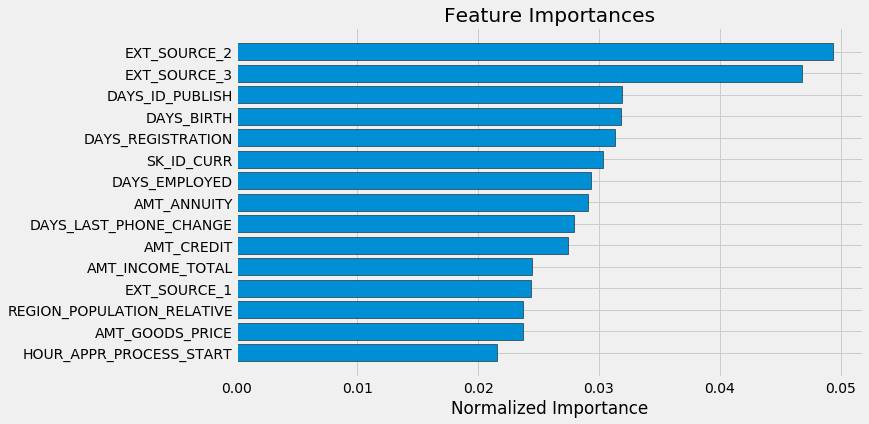

In [52]:
def plot_feature_importances(df):
   
    df = df.sort_values('importance', ascending = False).reset_index()
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

feature_importances_sorted = plot_feature_importances(feature_importances)

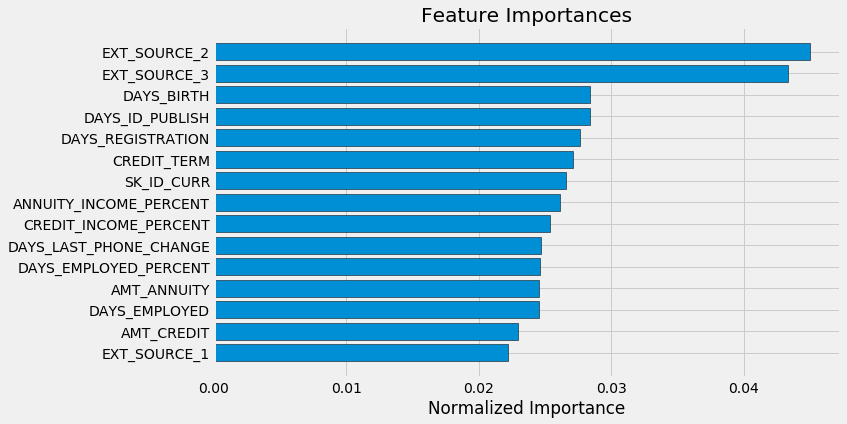

In [53]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

우리는 수공예 기능 네 가지가 모두 상위 15위 안에 든 것을 보고 있습니다! 이는 우리의 도메인 지식이 최소한 부분적으로나마 궤도에 올랐다는 확신을 줄 것입니다.

## Conclusions
우리는 먼저 자료, 업무, 제출물 심사 기준 등을 확실히 이해했습니다. 그런 다음 모델링에 도움이 될 수 있는 관계, 동향 또는 이상 징후를 식별하기 위해 매우 간단한 EDA를 수행했습니다. 그러는 동안, 우리는 범주형 변수 인코딩, 결측값 귀속, 기능 범위 확대와 같은 필요한 사전 처리 단계를 수행했습니다. 그런 다음 기존 데이터에서 새로운 기능을 구축하여 모델에 도움이 되는지 확인했습니다.

데이터 탐색, 데이터 준비 및 기능 엔지니어링이 완료되면 개선하고자 하는 기본 모델을 구현했습니다. 그리고 나서 우리는 첫 번째 점수를 능가하기 위해 약간 더 복잡한 두 번째 모델을 만들었습니다. 또한 엔지니어링 변수를 추가하는 효과를 확인하기 위한 실험을 수행했습니다.

우리는 기계 학습 프로젝트의 일반적인 개요를 따랐습니다.

1. 문제와 데이터를 이해합니다.
2. 데이터 정리 및 포맷(대부분 우리를 위해 수행되었습니다)
3. 탐색적 데이터 분석입니다.
4. 기준선 모델
5. 개선된 모델입니다.
6. 모델 해석(조금만)입니다.
  
기계 학습 경쟁은 단일 메트릭에서 최고의 성능을 달성하는 데만 관심이 있고 해석에는 관심이 없다는 점에서 일반적인 데이터 과학 문제와 약간 다릅니다. 하지만, 우리의 모델이 어떻게 결정을 내리는지를 이해하려고 노력함으로써, 우리는 오류를 수정하기 위해 그것들을 개선하거나 실수를 조사하려고 노력할 수 있습니다. 향후의 노트북에서는 더 많은 데이터 소스를 통합하고, 더 복잡한 모델을 구축하며(다른 사람의 코드를 따름) 점수를 높이는 방안을 모색할 것입니다.  
  
저는 이 노트북이 여러분을 이 기계 학습 대회에 참가하게 하고 여러분이 이제 지역 사회의 도움으로 스스로 나가서 몇 가지 큰 문제에 대해 연구할 준비가 되었기를 바랍니다!
  

#### Follow-up Notebooks¶
이 문제를 계속 해결하고자 하는 분들을 위해 후속 노트북이 몇 권 있습니다.

수동 기능 엔지니어링 파트 1 : https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
수동 형상 엔지니어링 파트 2 : https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2
자동 기능 엔지니어링 : https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics
고급 자동 기능 엔지니어링 :https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory
피쳐 선택 : https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection
모델 튜닝 소개: 그리드 및 랜덤 검색: https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
  
언제나 그렇듯이, 저는 피드백과 건설적인 비판을 환영합니다. 저는 Tooming Data Science에 https://medium.com/@twitterkohrsen/에서 글을 쓰고 있으며, Twitter에서 https://twitter.com/koehrsen_will으로 연락하실 수 있습니다.

## Just for Fun: Light Gradient Boosting Machine

선택사항으로 우리는 실제 기계 학습 모델인 LightGBM 라이브러리를 사용하는 Gradient Boosting Machine을 사용할 수 있습니다! Gradient Boosting Machine은 현재 구조화된 데이터 세트(특히 Kaggle에서)에 대한 학습을 위한 선도적인 모델이며 경쟁에서 잘하기 위해서는 이 모델의 어떤 형태가 필요할 것입니다.  
  
걱정하지 마세요, 비록 이 코드가 위협적으로 보일지라도, 그것은 단지 완전한 모델에 이르는 일련의 작은 단계일 뿐입니다. 이 코드를 추가한 이유는 이 프로젝트를 위해 무엇이 준비되었는지, 그리고 리더보드에서 조금 더 높은 점수를 얻기 때문입니다. 향후의 노트북에서는 보다 고급 모델(대부분 기존 코드를 조정하여 더 잘 작동하도록), 기능 엔지니어링 및 기능 선택으로 작업하는 방법을 알아보겠습니다. 다음 노트북에서 만나요!

In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

"""가벼운 경사로 부스팅 모델을 교육하고 테스트합니다.
    교차 검증입니다. 
    
    매개 변수
    --------
        features (pd.DataFrame): 
            사용할 교육 기능의 데이터 프레임입니다. 
            모델 교육을 위한 것입니다. Target 열을 포함해야 합니다.
        test_features (pd.DataFrame): 
            사용할 테스트 기능의 데이터 프레임입니다.
            모형으로 예측하기 위한 것입니다. 
        encoding (str, default = 'ohe'): 
            범주형 변수를 인코딩하는 방법입니다. 원핫 인코딩의 경우 'ohe' 또는 정수 레이블 인코딩의 경우 'le'입니다.
         n_folds (int, default = 5): 
            교차 검증에 사용할 fold 수입니다.
        
    리턴 값
    --------
        submission (pd.DataFrame): 
            'SK_'ID_CURR 및 모형이 예측한 'TARGET'이 있는 데이터 프레임입니다.
        feature_importances (pd.DataFrame): 
            데이터 프레임에 모델의 기능 중요도가 포함됩니다.
        valid_metrics (pd.DataFrame): 
            데이터 프레임에 대한 교육 및 검증 메트릭(ROC AUC)이 포함되어 있습니다.
    """

def model(features,test_features,encoding='ohe',n_folds=5):
    #ID 분리
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Target 분리
    labels = features['TARGET']
    
    # id와 target 제거
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)

        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        cat_indices = 'auto'
    
    # 정수 label encoding
    elif encoding == 'le':
        
        label_encoder = LabelEncoder()
        
        cat_indices = []
        
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                cat_indices.append(i)
                
    #에러 처리
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    feature_names = list(features.columns)
    
    features = np.array(features)
    test_features = np.array(test_features)
    
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    feature_importance_values = np.zeros(len(feature_names))
    
    test_predictions = np.zeros(test_features.shape[0])
    
    out_of_fold = np.zeros(features.shape[0])
    
    valid_scores = []
    train_scores = []
    
    for train_indices, valid_indices in k_fold.split(features):
        
        train_features, train_labels = features[train_indices], labels[train_indices]
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        best_iteration = model.best_iteration_
        
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        

    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [55]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798723	train's binary_logloss: 0.547797	valid's auc: 0.755039	valid's binary_logloss: 0.563266
[400]	train's auc: 0.82838	train's binary_logloss: 0.518334	valid's auc: 0.755107	valid's binary_logloss: 0.545575
Early stopping, best iteration is:
[315]	train's auc: 0.816657	train's binary_logloss: 0.530116	valid's auc: 0.755215	valid's binary_logloss: 0.552627
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798409	train's binary_logloss: 0.548179	valid's auc: 0.758332	valid's binary_logloss: 0.563587
[400]	train's auc: 0.828244	train's binary_logloss: 0.518308	valid's auc: 0.758563	valid's binary_logloss: 0.545588
Early stopping, best iteration is:
[317]	train's auc: 0.8169	train's binary_logloss: 0.529878	valid's auc: 0.758754	valid's binary_logloss: 0.552413
Training until validation scores don't impr

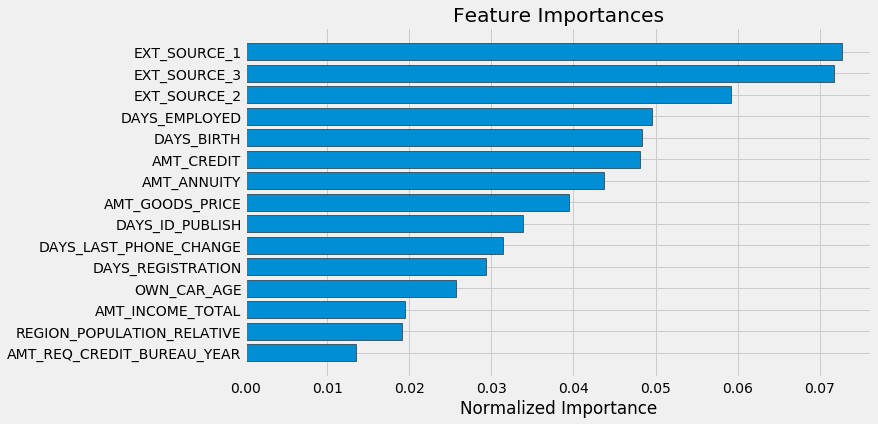

In [56]:
fi_sorted = plot_feature_importances(fi)

In [57]:
submission.to_csv('baseline_lgb.csv', index = False)

이 제출은 리더보드에서 약 0.735점을 받습니다.

In [58]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804779	train's binary_logloss: 0.541283	valid's auc: 0.762511	valid's binary_logloss: 0.557227
Early stopping, best iteration is:
[268]	train's auc: 0.815523	train's binary_logloss: 0.530413	valid's auc: 0.763069	valid's binary_logloss: 0.550276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804016	train's binary_logloss: 0.542318	valid's auc: 0.765768	valid's binary_logloss: 0.557819
Early stopping, best iteration is:
[218]	train's auc: 0.807075	train's binary_logloss: 0.539112	valid's auc: 0.766062	valid's binary_logloss: 0.555952
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.8038	train's binary_logloss: 0.542856	valid's auc: 0.7703	valid's binary_logloss: 0.557925
[400]	train's auc: 0.834559	train's binary_logloss: 0.511454	valid's auc: 0.770511	valid's binary_

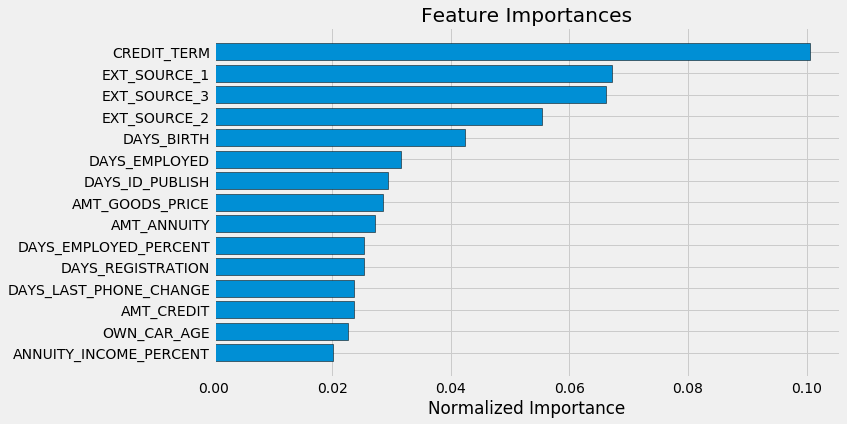

In [59]:
fi_sorted = plot_feature_importances(fi_domain)

다시, 우리는 우리의 특징 중 일부가 그것을 가장 중요한 것으로 만들었다고 봅니다. 앞으로, 우리는 이 문제에 도움이 될 수 있는 다른 도메인 지식 기능이 무엇인지에 대해 생각해 볼 필요가 있을 것입니다. (아니면 금융 산업에 대해 더 잘 아는 사람과 상담해야 합니다!)

In [60]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index = False)

이 모델은 도메인 기능이 성능을 향상시킨다는 것을 나타내는 공개 리더보드에 제출되었을 때 약 0.754점을 받았습니다! 피처 엔지니어링은 이 경쟁에서 중요한 부분이 될 것입니다(모든 머신 러닝 문제에 해당됨).